In [1]:
import numpy as np

# Load the .npy file
array = np.load('x_train.npy')
# print(len(array[1]))
print(array)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the x_train.npy file with allow_pickle=True
x_train = np.load('x_train.npy', allow_pickle=True)

# Load the corresponding labels file
labels = np.load('y_train.npy', allow_pickle=True)

# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Initialize a dictionary to store indices of samples for each class
class_indices = {class_name: [] for class_name in class_names}

# Populate the class_indices dictionary
for i, label in enumerate(labels):
    # print(i ,label)
    class_indices[class_names[label]].append(i)
print(len(class_indices['0']))
# Visualize 5 samples from each class

5923


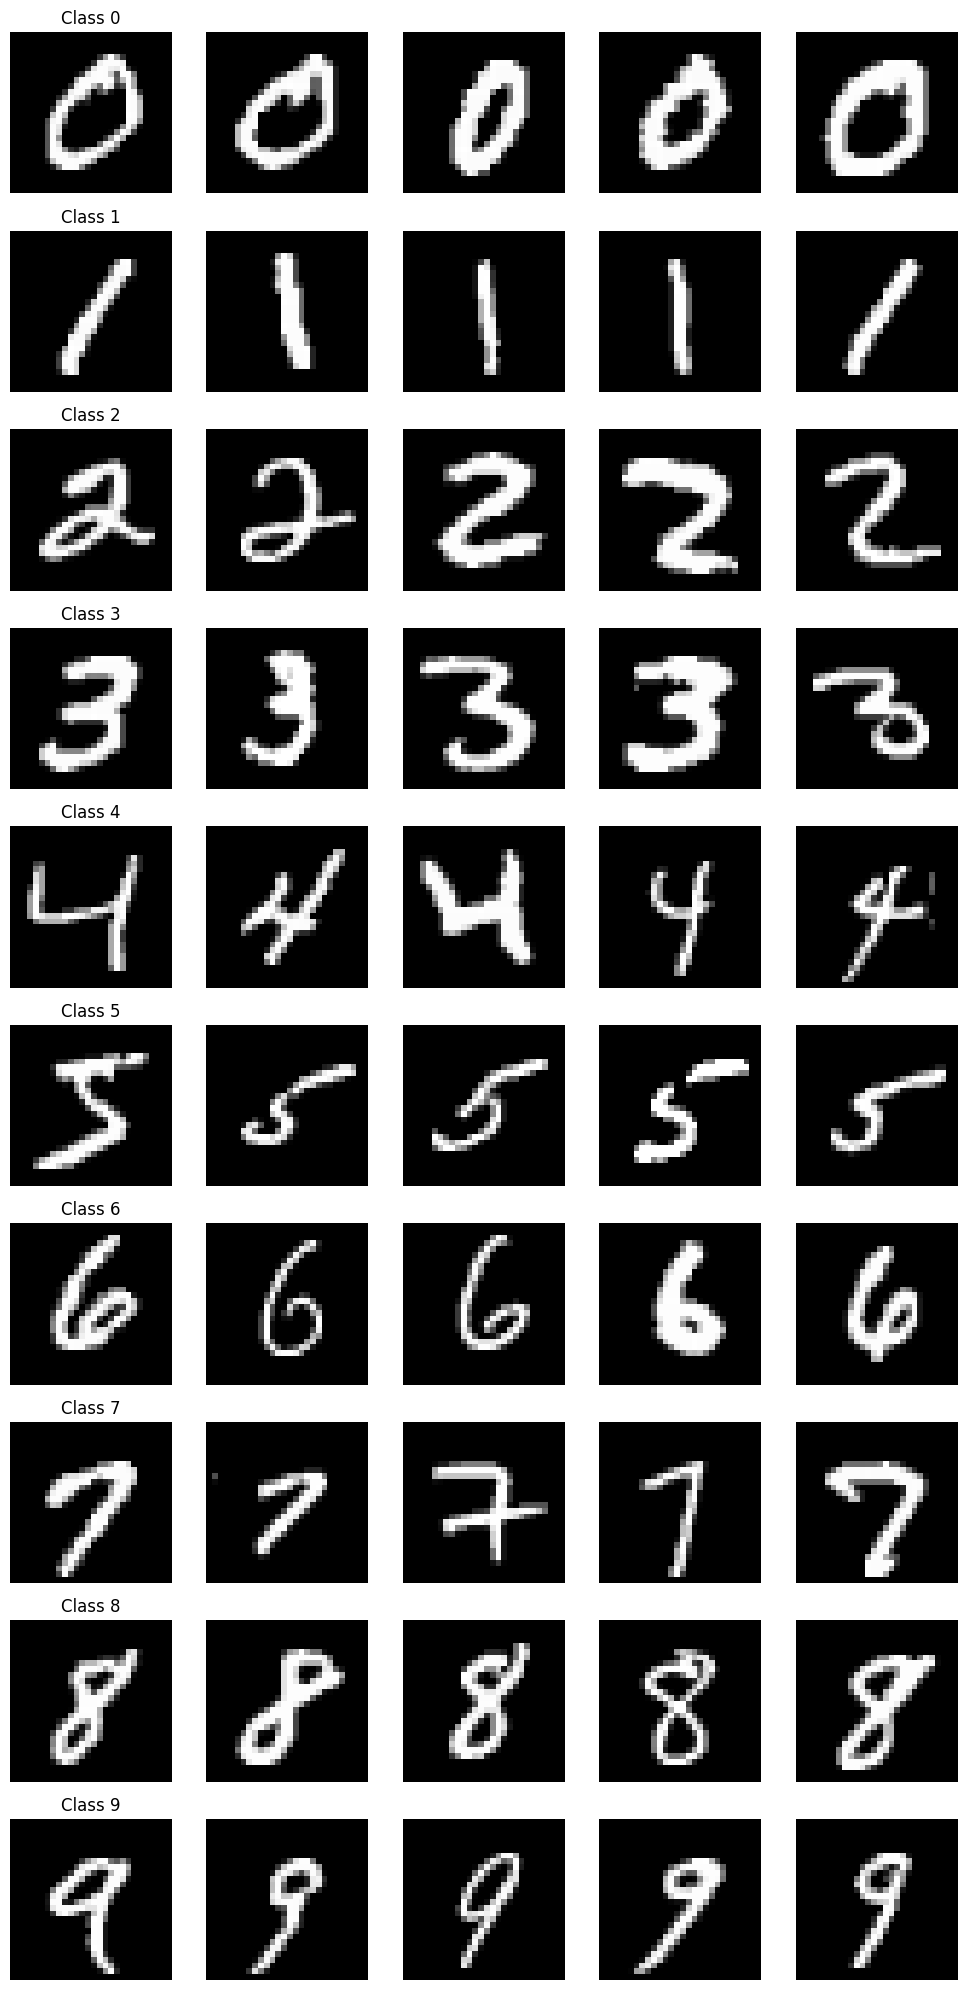

In [3]:
num_samples_per_class = 5
fig, axes = plt.subplots(nrows=len(class_names), ncols=num_samples_per_class, figsize=(10, 20))

for i, class_name in enumerate(class_names):
    indices = class_indices[class_name][:num_samples_per_class]
    for j, idx in enumerate(indices):
        ax = axes[i, j]
        ax.imshow(x_train[idx], cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_title(f'Class {class_name}')
plt.tight_layout()
plt.show()

In [4]:
x_train_vectorized = x_train.reshape(-1, 784)

# Regularization parameter (small positive value)
lambda_reg = 1e-6

# Class means and covariances dictionaries with regularization
class_means = {class_name: np.zeros(784) for class_name in class_names}
class_covariances = {class_name: np.zeros((784, 784)) for class_name in class_names}

# Calculate class means and covariances with regularization
for class_name, indices in class_indices.items():
    class_data = x_train_vectorized[indices]
    class_means[class_name] = np.mean(class_data, axis=0)

    # Add identity matrix with regularization to covariance matrix
    identity_matrix = np.eye(class_data.shape[1])
    class_covariances[class_name] = np.cov(class_data.T) + lambda_reg * identity_matrix
print(len(class_means['0']))

# Example usage (you can modify this for further processing)
# mean_image_0 = class_means['6'].reshape(28, 28)
# plt.imshow(mean_image_0, cmap='gray')
# plt.title('Mean image for class 0')
# plt.show()

784


In [1]:
import numpy as np
from scipy.linalg import inv, det

def predict(x_test):
    # Populate the class_indices dictionary
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    class_indices = {class_name: [] for class_name in class_names}
    for i, label in enumerate(x_test):
        class_indices[class_names[label]].append(i)

    # Calculate class priors
    class_prior = []
    for value in class_indices.values():
        class_prior.append(len(value) / len(x_test))

    return class_prior

def QDA(x, class_mean, class_covariance, class_prior):
    det_covariance = det(class_covariance)
    inv_covariance = inv(class_covariance)
    diff = x - class_mean
    if det_covariance == 0:
        det_covariance = np.nextafter(0, 1)  # Add a small positive value to avoid division by zero
    discriminant = -0.5 * np.dot(np.dot(diff, inv_covariance), diff.T)  - 0.5 * np.log(det_covariance) + np.log(class_prior)
    return discriminant

# Load test data
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# Flatten the images
x_test_flattened = x_test.reshape(x_test.shape[0], -1)
discriminants = []
for i in range(10):  # Assuming there are 10 classes
    class_prior = predict(x_test_flattened)  # Calculate class prior for the current sample
    discriminant = QDA(x_test_flattened, class_means[i], class_covariances[i], class_prior)
    discriminants.append(discriminant)

predicted_label = np.argmax(discriminants)

# Use the provided class means and covariances for prediction
# class_means = np.load('class_means.npy')
# class_covariances = np.load('class_covariances.npy')

# Use the predict function to get class priors
class_prior = predict(y_test)

# Make predictions for each sample in the test set
predicted_labels = []
for sample in x_test_flattened:
    discriminants = []
    for i in range(10):  # Assuming there are 10 classes
        discriminant = QDA(sample, class_means[i], class_covariances[i], class_prior[i])
        discriminants.append(discriminant)
    predicted_label = np.argmax(discriminants)  # Choose the class with the highest discriminant
    predicted_labels.append(predicted_label)

# Calculate overall accuracy
overall_accuracy = np.mean(predicted_labels == y_test)
print("Overall Accuracy:", overall_accuracy)

# Calculate class-wise accuracy
class_accuracies = {}
for class_label in range(10):
    class_indices = (y_test == class_label)
    class_y_true = y_test[class_indices]
    class_y_pred = predicted_labels[class_indices]
    class_accuracy = np.mean(class_y_true == class_y_pred)
    class_accuracies[class_label] = class_accuracy

# Print class-wise accuracies
print("Class-wise Accuracies:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: {accuracy:.4f}")


ModuleNotFoundError: No module named 'scipy'

In [ ]:
# Load train and test data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# Flatten the images if needed
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Create and fit the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_flattened, y_train)

# Use the trained QDA model to predict class labels for the test data
predicted_labels = qda.predict(x_test_flattened)

# Calculate overall accuracy
overall_accuracy = np.mean(predicted_labels == y_test)
print("Overall Accuracy:", overall_accuracy)

# Calculate class-wise accuracy
class_accuracies = {}
for class_label in np.unique(y_test):
    class_indices = (y_test == class_label)
    class_y_true = y_test[class_indices]
    class_y_pred = predicted_labels[class_indices]
    class_accuracy = np.mean(class_y_true == class_y_pred)
    class_accuracies[class_label] = class_accuracy

# Print class-wise accuracies
print("Class-wise Accuracies:")
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label}: {accuracy:.4f}")


c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Overall Accuracy: 0.5413
Class-wise Accuracies:
Class 0: 0.9684
Class 1: 0.9498
Class 2: 0.1647
Class 3: 0.2762
Class 4: 0.1171
Class 5: 0.0717
Class 6: 0.9562
Class 7: 0.2802
Class 8: 0.6119
Class 9: 0.9495


In [ ]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load x_test and y_test from local files
x_test = np.load('x_test.npy', allow_pickle=True).reshape(-1, 784)
y_test = np.load('y_test.npy', allow_pickle=True)

# Create QDA classifier object
qda = QuadraticDiscriminantAnalysis()

# Train the classifier
qda.fit(_train, y_train)

# Make predictions
y_pred = qda.predict(x_test)

# Compute overall accuracy
overall_accuracy = np.mean(y_test == y_pred)

# Initialize dictionary to store accuracies for each class
class_accuracies = {}

# Compute accuracy for each class
for class_label in range(10):
    # Filter predictions and true labels for the current class
    class_indices = (y_test == class_label)
    class_y_true = y_test[class_indices]
    class_y_pred = y_pred[class_indices]
    
    # Compute accuracy for the current class
    class_accuracy = np.mean(class_y_true == class_y_pred)
    
    # Store accuracy for the current class
    class_accuracies[class_label] = class_accuracy

# Print overall accuracy
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Print class-wise accuracies
print("Class-wise Accuracies:")
for class_label, accuracy in class_accuracies.items():
    print(f"  Class {class_label}: {accuracy:.4f}")


NameError: name '_train' is not defined